# tp

## Setup


In [94]:
# IMPORTAR LIBRARIES
import pandas as pd #se utiliza desde el inciso a)
import matplotlib.pyplot as plt #se utiliza desde el inciso c)
# !pip install seaborn
import seaborn as sns #se utiliza desde el inciso d)

In [95]:
#DIRECTORIES
output_dir = '../output/'
input_dir = '../input/'

#a
EPH_excel_dir = input_dir + 'EPH_usu_1er_Trim_2023_xlsx/usu_individual_T123.xlsx'
#c
graph_2c_comp_gender = output_dir+'[2c] grafico_comp_gender.png'
table_2f_selected_cols_dir = output_dir+'[2f] tabla_output_sel_columns.csv'

## 2.

###  a)

In [96]:
#utilizando el archivo referenciado previamente creamos un dataframe
dataframe = pd.read_excel(EPH_excel_dir)

datos = dataframe.copy() #se copian para no modificar los originales

# Guardamos a los que son del AMBA
df_EPH_AMBA = datos[datos['AGLOMERADO'].isin([32, 33])]

### b)

In [97]:
# b
df_EPH_AMBA = df_EPH_AMBA.drop(df_EPH_AMBA[df_EPH_AMBA['PP08D1'] <= 0].index)

df_EPH_AMBA = df_EPH_AMBA.drop(df_EPH_AMBA[df_EPH_AMBA['CH06'] <= 0].index)

df_EPH_AMBA = df_EPH_AMBA.drop(df_EPH_AMBA[df_EPH_AMBA['ITF'] <= 0].index)

df_EPH_AMBA = df_EPH_AMBA.drop(df_EPH_AMBA[df_EPH_AMBA['IPCF'] <= 0].index)

### c)

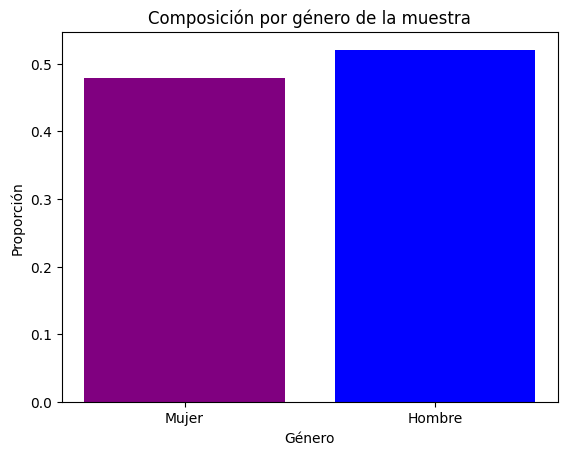

In [98]:
# c
datos['mujer'] = (datos['CH04'] == 1).astype(int)
datos['hombre'] = (datos['CH04'] == 2).astype(int)

# Datos para el gráfico de barras
total_mujeres = datos['mujer'].sum()
total_hombres = datos['hombre'].sum()
prop_m = total_mujeres / len(datos)
prop_h = total_hombres / len(datos)

# Colores para las barras
colores = ['purple', 'blue']

# Crear el gráfico de barras con las proporciones
plt.bar(['Mujer', 'Hombre'], [prop_m, prop_h], color=colores)

# Etiquetas para el gráfico
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.title('Composición por género de la muestra')

#Guardar Grafico
plt.savefig(graph_2c_comp_gender, format='png')

# Mostrar el gráfico
plt.show()


### d)

In [99]:
# d
df_EPH_AMBA.rename(columns={'CH04': 'Genero'}, inplace=True)
df_EPH_AMBA.rename(columns={'CH07': 'Estado Civil'}, inplace=True)
df_EPH_AMBA.rename(columns={'CH08': 'Cobertura Medica'}, inplace=True)

d = pd.df_EPH_AMBA({df_EPH_AMBA['Genero'], df_EPH_AMBA['Estado Civil'], df_EPH_AMBA['Cobertura Medica'], df_EPH_AMBA['NIVEL_ED'], df_EPH_AMBA['ESTADO'], df_EPH_AMBA['CAT_INAC'], df_EPH_AMBA['IPCF']})
sns.heatmap(d.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

AttributeError: module 'pandas' has no attribute 'df_EPH_AMBA'

### e)

In [100]:
# e
df_EPH_AMBA['unem'] = (df_EPH_AMBA['ESTADO'] == 2).astype(int)
df_EPH_AMBA['emp'] = (df_EPH_AMBA['ESTADO'] == 1).astype(int)
df_EPH_AMBA['inac'] = (df_EPH_AMBA['ESTADO'] == 3).astype(int)

total_emp = df_EPH_AMBA['emp'].sum()
total_unemp = df_EPH_AMBA['unem'].sum()
total_inac= df_EPH_AMBA['inac'].sum()

media_unem = df_EPH_AMBA[df_EPH_AMBA['unem'] == 1]['IPCF'].mean()
media_emp = df_EPH_AMBA[df_EPH_AMBA['emp'] == 1]['IPCF'].mean()
media_inac = df_EPH_AMBA[df_EPH_AMBA['inac'] == 1]['IPCF'].mean()

### f)
Utilizando el archivo tabla `adulto_equiv.xlsx`, agreguen a su base de datos una columna llamada `adulto_equiv` que contenga los valores de adulto equivalente de cada persona según su sexo y edad (por ejemplo, a un varón de 2 años le corresponde 0.46). Finalmente, con el comando `groupby` sumen esta nueva columna para las personas que pertenecen a un mismo hogar y guarden ese dato en una columna llamada `ad_equiv_hogar`

##### Ejemplos
[1] Si una familia está compuesta por:
1. Un varón de 40 años (`adulto_equiv = 1`)
2. y su esposa de la misma edad (`adulto_equiv = 0.77`)
3. y **4.** con sus mellizos varones de 5 años (`adulto_equiv = 0.60` cada uno)

A todos se les debería imputar en `ad_equiv_hogar = 2.97`, que es la cantidad de adultos equivalentes en ese hogar.

[2] 
| descripcion |sexo | edad | score |
| --- | --- | --- | --- |
|mujer de 35 años | f | 30-45 | 0.77 |
|su hijo de 18 años | m | 18-29 | 1.02 |
|su madre de 61 años | f | 61-75 | 0.67 |
| **TOTAL** | | | **2.46** |

[3] 
| descripcion |sexo | edad | score |
| --- | --- | --- | --- |
| varón de 35 años | m | 30-45 | 1.00 |
| mujer de 31 años | f | 30-45 | 0.77 |
| hijo de 6 años | m | 6 | 0.64 |
| hija de 8 años | f | 8 | 0.68 |
| **TOTAL** | | | **3.09** |

[4] 
| descripcion |sexo | edad | score |
| --- | --- | --- | --- |
| varón de 30 años | m | 30-45 | 1.00 |
| mujer de 30 años | f | 30-45 | 0.77 |
| hijo de 5 años | m | 5 | 0.60 |
| hijo de 3 años | m | 3 | 0.51 |
| hijo de 1 años | m | 1 | 0.37 |
| **TOTAL** | | | **3.25** |		 			 

#### Tabla de equivalencias de necesidades energéticas. 
Unidades de adulto equivalente, según sexo y edad

| Edad (años)	| Mujeres |	Varones |
| -- | -- | -- |
| < 1 | 0.35 | 0.35 |
| 1 | 0.37 | 0.37 |
| 2 | 0.46 | 0.46 |
| 3 | 0.51 | 0.51 |
| 4 | 0.55 | 0.55 |
| 5 | 0.60 | 0.60 |
| 6 | 0.64 | 0.64 |
| 7 | 0.66 | 0.66 |
| 8 | 0.68 | 0.68 |
| 9 | 0.69 | 0.69 |
| 10 | 0.70 | 0.79 |
| 11 | 0.72 | 0.82 |
| 12 | 0.74 | 0.85 |
| 13 | 0.76 | 0.90 |
| 14 | 0.76 | 0.96 |
| 15 | 0.77 | 1.00 |
| 16 | 0.77 | 1.03 |
| 17 | 0.77 | 1.04 |
| 18-29 | 0.76 | 1.02 |
| 30-45 | 0.77 | 1.00 |
| 46-60 | 0.76 | 1.00 |
| 61-75 | 0.67 | 0.83 |
| < 75 | 0.63 | 0.74 |


#### Codigo 2-f

In [101]:
# Definir la tabla de equivalencias necesarias eneréticas según edad y sexo
equiv_energ = { 
  1 : { #si es 1 = Varón
    (0, 0.99): 0.35, #0.35 es el valor de un varón menor a 1 año
    (1, 1): 0.37,
    (2, 2): 0.46,
    (3, 3): 0.51,
    (4, 4): 0.55,
    (5, 5): 0.6,
    (6, 6): 0.64,
    (7, 7): 0.66,
    (8, 8): 0.68,
    (9, 9): 0.69,
    (10, 10): 0.79,
    (11, 11): 0.82,
    (12, 12): 0.85,
    (13, 13): 0.9,
    (14, 14): 0.96,
    (15, 15): 1,
    (16, 16): 1.03,
    (17, 17): 1.04,
    (18, 29): 1.02,
    (30, 45): 1,
    (46, 60): 1,
    (61, 75): 0.83,
    (75, 200): 0.74
  },
  2 : { #si es 2 = Mujer
    (0, 0.99): 0.35,
    (1, 1): 0.37,
    (2, 2): 0.46,
    (3, 3): 0.51,
    (4, 4): 0.55,
    (5, 5): 0.6,
    (6, 6): 0.64,
    (7, 7): 0.66,
    (8, 8): 0.68,
    (9, 9): 0.69,
    (10, 10): 0.7,
    (11, 11): 0.72,
    (12, 12): 0.74,
    (13, 13): 0.76,
    (14, 14): 0.76,
    (15, 15): 0.77,
    (16, 16): 0.77,
    (17, 17): 0.77,
    (18, 29): 0.76,
    (30, 45): 0.77,
    (46, 60): 0.76,
    (61, 75): 0.67,
    (75, 200): 0.63
    }
}

In [102]:
#Función para calcular 'adulto_equiv' basado en la edad y el sexo
def calculate_adulto_equiv(row):
  age = row['Edad'] #Obterner valor de "edad" del la row del df
  sex = row['Genero'] #Obterner valor de "edad" del la row del df
  
  if sex in equiv_energ: #Verificar,por las dudas, si el sexo está en el dic
     # Loopear los rangos de edad y valores en el dic
    for (start, end), value in equiv_energ[sex].items():
        if start <= age <= end: 
            return value #Devolver el valor correcto, si la edad está en el rango
  else: 
    print(f'Not found [age:{age}, sex:{sex}]')
  
  return 0 #devolver 0 como valor predeterminado

In [103]:
df_EPH_AMBA.rename(columns={'CH06': 'Edad'}, inplace=True)

df_EPH_AMBA['adulto_equiv'] = df_EPH_AMBA.apply( #guarda el resultado de la funcion
    lambda row: calculate_adulto_equiv(row), axis=1)#Aplica calculate_adulto_equiv a cada fila del df

#Obtener 'ad_equiv_hogar' para cada row del df con groupby y transform
df_EPH_AMBA['ad_equiv_hogar'] = df_EPH_AMBA.groupby('CODUSU')['adulto_equiv'].transform('sum')
#Por el problema: base2 & floating point -> redondeamos a 2 decimales(estandar en esta base de datos)
df_EPH_AMBA['ad_equiv_hogar'] = df_EPH_AMBA['ad_equiv_hogar'].round(2)

In [104]:
#Exportar .csv de los datos relacionados con el inciso para verificar:
# Seleccionamos las columnas relevantes
columns_to_keep = ['CODUSU','COMPONENTE', 'Edad', 'Genero', 'adulto_equiv','ad_equiv_hogar']
# Creamos un df solo con las columnas seleccionadas
selected_columns_df = df_EPH_AMBA.loc[:, columns_to_keep]
# Salvamos df a .csv
selected_columns_df.to_csv(table_2f_selected_cols_dir, index=False)